In [ ]:
!pip install stockfish
#!pip install chess-board
!chmod +x /content/stockfish/stockfish
!pip install python-chess==0.31.3
#!pip install stockfish

In [ ]:
#import libraries
import chess
import chess.engine
import numpy as np
import tensorflow as tf
from stockfish import Stockfish
from Agent import Agent
from Environment import Environement
from dataload import DataLoad
from Player import Player
#from Stockfish\ Learning.stkfish import stkfish


In [ ]:
#run to play as white
player = Player()
AI = Agent(isWhite = False)
env = Environement(player,AI)

In [ ]:
#run to play as black
player = Player()
AI = Agent(isWhite = True)
env = Environement(AI,player)

In [ ]:
#start game
env.Game()

Consensus from Model votes:
 ['d5d6', 'g1h3', 'b2b4', 'b2b4', 'b2b4', 'c1g5', 'c1g5', 'c1g5', 'b1c3', 'b1c3', 'e2e4', 'g1f3', 'd5d6', 'c1e3', 'a2a4']
Unique moves:
 ['d5d6', 'e2e4', 'c1g5', 'g1h3', 'b1c3', 'g1f3', 'c1e3', 'b2b4', 'a2a4']
voting scores on move options:
 [2.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 3.0, 1.0]
Evaluation of votes cast:
 [-132, 47, -548, 0, 22, 26, -25, -150, -17]
Selecting move of highest confidence:  c1g5
best move to make according to Stockfish:  a2a3 

r n b q k b n r
p p p p . p . p
. . . . . . p .
. . . P p . B .
. . . . . . . .
. . . . . . . .
P P P . P P P P
R N . Q K B N R

Legal Moves to make: g8e7 g8h6 g8f6 f8g7 f8e7 f8h6 f8d6 f8c5 f8b4 f8a3 d8e7 d8f6 d8g5 b8c6 b8a6 h7h6 f7f6 d7d6 c7c6 b7b6 a7a6 e5e4 h7h5 f7f5 c7c5 b7b5 a7a5


KeyboardInterrupt: ignored

In [ ]:
import os
import pandas as pd
import keras
import chess
import numpy as np
from dataload import split_dims, squares_index, move_dims
import Model
from tensorflow.keras import models, layers
import tensorflow as tf
#from stockfish import Stockfish
from IPython.display import clear_output

model = models.load_model("/content/White Weights/WModel7.h5")

In [ ]:
board = chess.Board()
BoardState = np.array(split_dims(board).reshape(1,8,8,14))
board

[output] = model.predict(BoardState)
#print(output.shape)

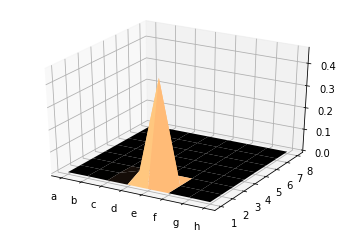

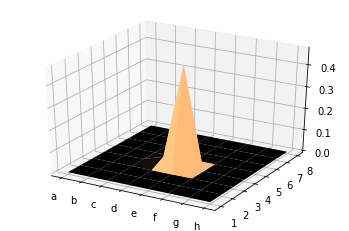

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy import interpolate
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')

Z = output[0,:64].reshape((8,8))


(X,Y) = np.meshgrid(np.arange(1,9),np.arange(1,9)[::-1])

Z2 = output[0,64:].reshape((8,8))


ax.plot_surface(X,Y,Z,cmap=cm.copper)
ax.axes.set_xticklabels(['0','a','b','c','d','e','f','g','h'])

ax2.plot_surface(X,Y,Z2,cmap=cm.copper)
ax2.axes.set_xticklabels(['0','a','b','c','d','e','f','g','h'])
plt.show()